<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [2]:
# следующая строчка подключает сертификат для защищенного соединения
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)
df = df.dropna()


Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
# показать максимальное число столбцов
pd.set_option('display.max_columns', None)
#показать часть строк
df.head()


,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

<function matplotlib.pyplot.show(close=None, block=None)>

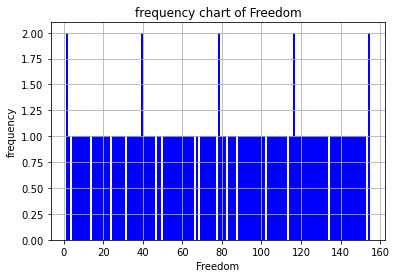

In [4]:
plt.hist (df['Freedom'], 150, facecolor='b')
plt.grid(True)
plt.title('frequency chart of Freedom')
plt.xlabel('Freedom')
plt.ylabel('frequency')
plt.show
 

<function matplotlib.pyplot.show(close=None, block=None)>

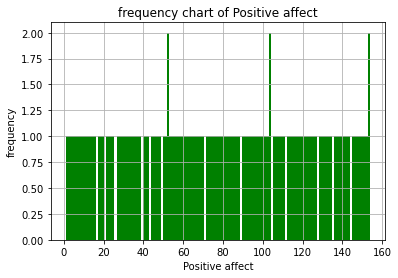

In [5]:
plt.hist (df['Positive affect'], 150, facecolor='green')
plt.grid(True)
plt.title('frequency chart of Positive affect')
plt.xlabel('Positive affect')
plt.ylabel('frequency')
plt.show

Ответ: распределение  параметров является мультимодальное


Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [6]:
print('Median: ', statistics.median(df['Freedom']),
      '\nMode: ', statistics.mode(df['Freedom']),
      '\nExpected value: ', statistics.mean(df['Freedom']),
      '\nStandart deviation: ', max(df['Freedom']),
      '\nDispersion: ', max(df['Freedom']),
      '\nMinimum: ', min(df['Freedom']),
      '\nMaximum: ', max(df['Freedom']),
      '\nScope: ', max(df['Freedom']) - min(df['Freedom'])) 


Median:  79.5 
Mode:  5.0 
Expected value:  78.82857142857142 
Standart deviation:  155.0 
Dispersion:  155.0 
Minimum:  1.0 
Maximum:  155.0 
Scope:  154.0


Почему нельзя найти моду?
Ответ: мода нашлась, но она неверна, т.к.разброс значений большой

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Коэффициент Пирсона: 0.6965670458090686


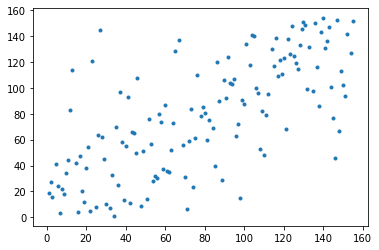

In [7]:
from scipy.stats import pearsonr
x = df['Freedom'] 
y = df['Positive affect']
corr, p_value = pearsonr(x, y) 
#графический вид корреляции
plt.scatter(x, y, marker='.')
print('Коэффициент Пирсона:', corr)

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [8]:
#Центрирование
norm_center = df['Freedom']
print(statistics.mean(norm_center))

78.82857142857142


In [9]:
norm_center_1 = norm_center - statistics.mean(norm_center)
print(statistics.mean(norm_center_1))

6.496390726949487e-15


In [10]:
min(norm_center_1)

-77.82857142857142

In [11]:
max(norm_center_1)


76.17142857142858

In [12]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

norm_center_2 = min_max_scaler.fit_transform(np.array(norm_center_1).reshape(-1, 1))
print(min(norm_center_2))
print(max(norm_center_2))


[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

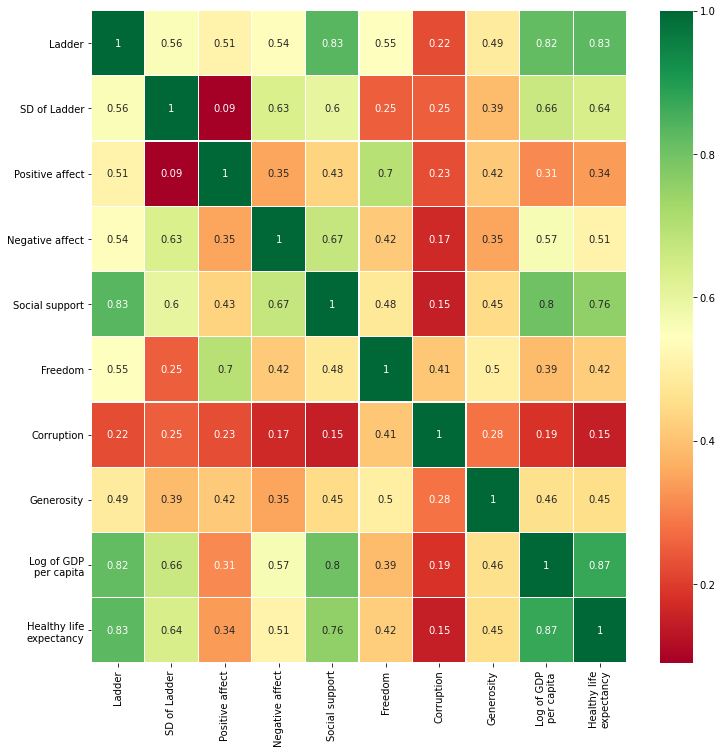

In [13]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [14]:
dataframe=pd.read_csv('avocado.csv')
dataframe[:3]

FileNotFoundError: [Errno 2] No such file or directory: 'avocado.csv'

Сделать частотный график колонки AveragePrice. Какое это распределение?

In [15]:
n, bins, patches = plt.hist(dataframe['AveragePrice'], 100, facecolor='b')

plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice')
plt.grid(True)
plt.show()

NameError: name 'dataframe' is not defined

Ответ: распределение многовершинное

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [16]:
from scipy.stats import pearsonr
crits = ['4046','4225','4770']
for crit in crits:
    x = dataframe[crit]
    y = dataframe['AveragePrice']
    
    corr, p_value = pearsonr(x, y)
    plt.scatter(x, y, marker='.',label=crit)
    print('Коэффициент  Пирсона:', corr)
plt.legend()
plt.show()

NameError: name 'dataframe' is not defined

In [17]:
from scipy.stats import pearsonr
x = dataframe['4046']
y = dataframe['AveragePrice']

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент  Пирсона:', corr)

NameError: name 'dataframe' is not defined

In [18]:
from scipy.stats import pearsonr
x = dataframe['4225']
y = dataframe['AveragePrice']

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент Пирсона:', corr)

NameError: name 'dataframe' is not defined

In [19]:
from scipy.stats import pearsonr
x = dataframe['4770']
y = dataframe['AveragePrice']

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент  Пирсона:', corr)

NameError: name 'dataframe' is not defined

Ответ: корелляция обратная везде